### Edgar Moises Hernandez-Gonzalez
#### 11/11/19-19/11/19
#### Clasificar RAW con CNN-1D

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 1000, 22))
x_test = x_test.reshape((n_samples_test, 1000, 22))

print(x_train.shape)
print(x_test.shape)

(288, 1000, 22)
(288, 1000, 22)


In [16]:
model = Sequential()
model.add(Conv1D(16,7, activation='relu', input_shape=(1000,22)))
model.add(MaxPool1D(2))
model.add(Conv1D(32,7, activation='relu'))
model.add(MaxPool1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 994, 16)           2480      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 497, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 491, 32)           3616      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 245, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1003648   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 1s 3ms/sample - loss: 5.3332 - acc: 0.2569 - val_loss: 1.7422 - val_acc: 0.2639
Epoch 2/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.4015 - acc: 0.3924 - val_loss: 1.3858 - val_acc: 0.2674
Epoch 3/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.3042 - acc: 0.4583 - val_loss: 1.3831 - val_acc: 0.2743
Epoch 4/20
288/288 [==============================] - 0s 2ms/sample - loss: 1.1383 - acc: 0.5243 - val_loss: 1.3825 - val_acc: 0.2986
Epoch 5/20
288/288 [==============================] - 0s 2ms/sample - loss: 0.8853 - acc: 0.6806 - val_loss: 1.5215 - val_acc: 0.2812
Epoch 6/20
288/288 [==============================] - 0s 2ms/sample - loss: 0.5736 - acc: 0.8021 - val_loss: 1.5603 - val_acc: 0.2847
Epoch 7/20
288/288 [==============================] - 0s 2ms/sample - loss: 0.3673 - acc: 0.9097 - val_loss: 1.5890 - val_acc: 0.3125
Epoch 8/20
288/2

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 476us/sample - loss: 2.3019 - acc: 0.3333
Test loss: 2.3019417391883
Test accuracy: 0.33333334


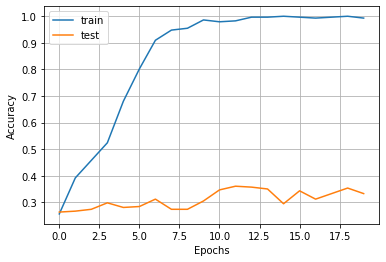

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

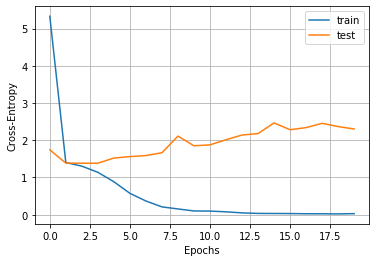

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.13888888888888884


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[32 23 12  5]
 [34 26  6  6]
 [18 14 18 22]
 [16 14 16 26]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.32      0.44      0.37        72
           1       0.34      0.36      0.35        72
           2       0.35      0.25      0.29        72
           3       0.44      0.36      0.40        72

   micro avg       0.35      0.35      0.35       288
   macro avg       0.36      0.35      0.35       288
weighted avg       0.36      0.35      0.35       288

